### Metadata

* Title: Probabilistic Data Analysis with Probabilistic Programming
* Date: August 2016
* Authors: Vikash Mansinghka and Feras Saad, from MIT.


### Context: Bayesian Non-Parametrics

Bayesian non-parametrics represents an early form of model abstraction. A researcher wants to develop some mixture model of her data. Rather than using traditional methods of model selection (fit various mixture models, varying the number components, and optimizing some objective function), she includes the number of components into the posterior, incorporating the Chinese Restaurant Process (Dirichlet process mixture) into the generative process, such that the number of components can grow as the complexity of the data grows. This idea is relevant as it introduces a means of doing probabilistic inference on model structure.

Further reading on that can be found <a href="http://www.cs.columbia.edu/~blei/papers/GershmanBlei2012.pdf">here</a>

### Context: Directed Graphical Models:

Graphical models are frameworks for describing relationships between observed and unobserved variables.

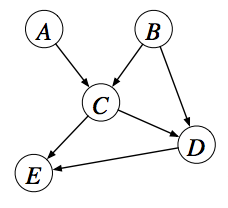

In [8]:
url = "https://qph.ec.quoracdn.net/main-qimg-d02450e8316735cc2079c3f240756b4e?convert_to_webp=true"
path = 'sample-graph.png'
from IPython import display
display.Image(data = path)
#display.Image(url = url)

Directed graphical models treat nodes as variables, and edges as dependencies. Conditioning on the parents of a node, that node is conditionally independent of all other nodes.

A DAG Model corresponds to a factorization of the joint probability distribution:

$p(A, B, C, D, E) = p(A)p(B)p(C|A, B)p(D|B, C)p(E|C, D)$

In general:

$p(X_1, . . . , Xn) = \prod_{i = 1}^{N} p(X_i|X_{parents (i)})$

Graphical models allow us to define general **message-passing algorithms** that
implement probabilistic inference efficiently. Thus we can answer queries like
“What is $p(A|C = c)?$” without enumerating all settings of all variables in the
model.

We see that conditioning on C, E and D provide no information about A. Therefore the original query as:

$\sum_{B,D,E}p(A)p(B)P(C=c|A,B)P(D|B,C=c)P(E|D,C=c) $

reduces to

$\sum_{B}P(A)P(B)P(C=c|A,B)$

### CGPMs, a motivation

We want to able to draw samples from and evaluate densities of random variables in a dataset. In particular, we want to be able to condition to condition on arbitrary data.

This is possible with a directed graphical model, but building and querying this program is not easily generalizable.

**Requirements**:
* Must save lots us lots of lines of code.
* Models must be accurate.
* Must cover a wide diversity of datasets and queries.